Q1. What is Simple Linear Regression?

-  Simple Linear Regression is a statistical method used to model the relationship between two continuous variables:
One independent variable (predictor or input) — usually denoted as x
One dependent variable (response or output) — usually denoted as y
The goal is to find a straight line (linear equation) that best predicts
y based on x.

The Equation of Simple Linear Regression : y=β0 + β1x+ ε

𝛽0 : Intercept (value of y when x=0)

𝛽1 : Slope (change in y for a one-unit change in x)

ε: Error term (the difference between actual and predicted values)



Q2. What are the key assumptions of Simple Linear Regression?

-  Simple Linear Regression relies on several key assumptions to ensure that the model's estimates are valid and the statistical inference is reliable. Here are the main assumptions:

1. Linearity - Assumption: The relationship between the independent variable x and the dependent variable y is linear.

Implication: The model 𝑦 =𝛽0+𝛽1𝑥 + 𝜀 correctly captures the relationship.
2. Independence of Errors:-
Assumption: The residuals (errors) are independent of each other.

Implication: No patterns or correlations in the residuals over time or sequence.
3. Homoscedasticity (Constant Variance)
Assumption: The variance of the errors is constant across all levels of x.

Implication: The spread of residuals should be roughly equal across all predicted values.

4. Normality of Errors
Assumption: The residuals are normally distributed.

Implication: Important for confidence intervals and hypothesis tests (e.g., p-values).

5. No Perfect Multicollinearity (Not applicable here)
This assumption is crucial in multiple linear regression, but in simple linear regression, there's only one predictor, so multicollinearity doesn’t apply.

Q3. What is heteroscedasticity, and why is it important to address in regression models?

-  Heteroscedasticity refers to the condition in a regression model where the variance of the residuals (errors) is not constant across all levels of the independent variable(s).The spread of the errors increases or decreases as the value of x changes.This violates one of the key assumptions of linear regression: homoscedasticity (constant variance of errors).

1. Biased Standard Errors
- Leads to incorrect p-values and confidence intervals.
- You might falsely conclude that a predictor is significant (Type I error).

2. Inefficient Estimates
- While the coefficients (e.g., 𝛽1) may still be unbiased, they’re no longer the best (minimum variance) estimates.
- This violates the Gauss-Markov theorem, which assumes homoscedasticity.

3. Poor Model Fit
- It may indicate the model is missing important variables or has the wrong functional form (e.g., a nonlinear relationship).



Q4. What is Multiple Linear Regression?

- Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between one dependent variable and two or more independent (predictor) variables.
It extends simple linear regression, which only involves one independent variable.

Q5. What is polynomial regression, and how does it differ from linear regression?

- Polynomial Regression is an extension of linear regression where the relationship between the independent variable x and the dependent variable y is modeled as an nth-degree polynomial.
It allows for curved (non-linear) relationships, while still being considered a linear model in terms of the coefficients.

| Feature                      | Simple Linear Regression  | Polynomial Regression                            |
| ---------------------------- | ------------------------- | ------------------------------------------------ |
| Relationship shape           | Straight line             | Curved line (parabolic, cubic, etc.)             |
| Equation                     | $y = \beta_0 + \beta_1 x$ | $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots$ |
| Captures non-linear patterns |  No                      | Yes                                            |
| Risk of overfitting          | Low                       | Higher with high-degree polynomials              |


Q6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data point

Intercept (β₀): 0.18
Slope (β₁): 1.98


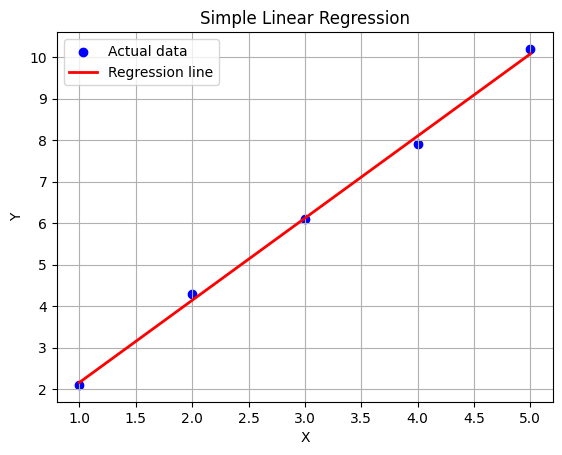

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]

X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Slope (β₁): {model.coef_[0]:.2f}")

plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Q7. Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below)

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)
X = df[['Area', 'Rooms']]
X = sm.add_constant(X)
y = df['Price']

model = sm.OLS(y, X).fit()
print(model.summary())

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Tue, 29 Jul 2025   Prob (F-statistic):             0.0377
Time:                        11:19:19   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Q8. Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.
(Include your Python code)

Model Coefficients:
Intercept: 0.0600
Coefficients: [0.   1.94 0.2 ]


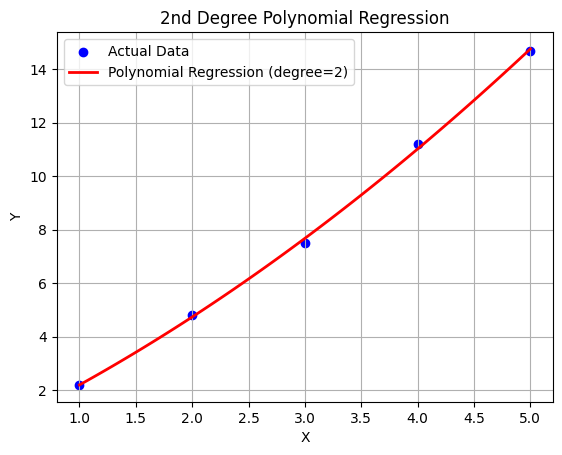

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

print("Model Coefficients:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {model.coef_}")

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X_range, Y_pred, color='red', linewidth=2, label='Polynomial Regression (degree=2)')
plt.title('2nd Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Q9. Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.
(Include your Python code and output in the code box below)

Intercept (β₀): 6.50
Slope (β₁): 1.15


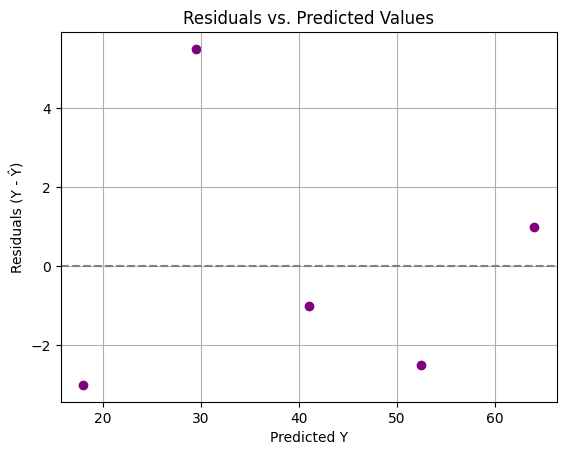

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Slope (β₁): {model.coef_[0]:.2f}")

plt.scatter(Y_pred, residuals, color='purple', marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Y")
plt.ylabel("Residuals (Y - Ŷ)")
plt.grid(True)
plt.show()

Q10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

- As a data scientist working on a house price prediction model using features like area, number of rooms, and location, detecting both heteroscedasticity and multicollinearity presents challenges that can distort predictions and statistical inference.

Here's how I would systematically address each issue to ensure a robust and interpretable model:

Part 1: Addressing Heteroscedasticity
Residuals show non-constant variance — predictions are more/less accurate for certain price ranges.This violates the assumptions of linear regression and leads to biased standard errors (wrong confidence intervals & p-values).

Steps to Fix:
1. Transform the Dependent Variable
2. Use Robust Standard Errors
3. Use Weighted Least Squares (WLS)

Part 2: Addressing Multicollinearity
Predictors like area and number of rooms are highly correlated, inflating VIF scores.
This leads to unstable coefficients and makes it difficult to interpret feature importance.

Steps to Fix:
1. Check VIF Scores
2. Remove or Combine Correlated Features
3. Dimensionality Reduction (Optional)
4. Regularization (Ridge/Lasso)

Final Steps: Model Validation and Monitoring
1. Cross-Validation
2. Residual Diagnostics
3. Interpretability